In [1]:
import pandas as pa

In [2]:
T=pa.read_csv('C:/Users/frederic/Desktop/IDF.csv',sep=';')

In [3]:
T.head()

nom  statut                  geo_point_2d  \
0      P     502  48.8580099177, 2.33780995992   
1  N999b     502  48.8383409973, 2.62528976066   
2    A5a     501  48.6073848555, 2.58683919574   
3   N406     502  48.7593991026, 2.48059367274   
4    A6a     501   48.805344485, 2.34065104349   

                                           geo_shape  objectid    st_lengths  
0  {"type": "LineString", "coordinates": [[2.2520...        41  34789.600460  
1  {"type": "LineString", "coordinates": [[2.6190...        40   2051.059186  
2  {"type": "LineString", "coordinates": [[2.5360...        18   9229.728859  
3  {"type": "LineString", "coordinates": [[2.4670...        39   2393.904264  
4  {"type": "LineString", "coordinates": [[2.3356...        21   2752.058571

In [4]:
import smopy
import pylab as pl

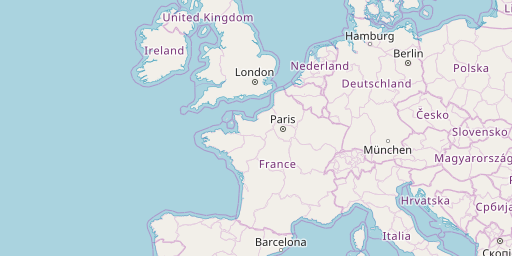

In [5]:
map = smopy.Map((42., -1., 55., 3.), z=4)
map.show_ipython()

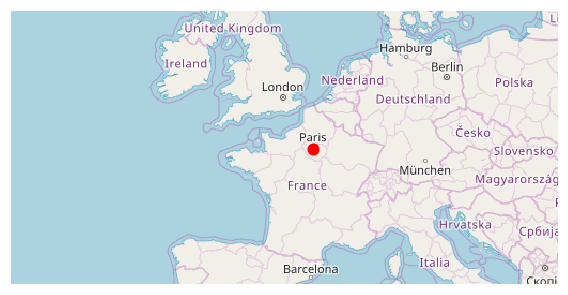

In [6]:
x, y = map.to_pixels(48.86151, 2.33474)
ax = map.show_mpl(figsize=(8, 6))
ax.plot(x, y, 'or', ms=10, mew=2)
pl.show()

In [7]:
import osmnx as ox
import networkx as nx

In [8]:
maison = ox.geocode('41 Cours pinteville, Meaux, 77100')
admin = ox.geocode('29 Rue de la Crèche, 77100 Meaux')

In [9]:
maison[0],maison[1]

(48.9608318, 2.8747149)

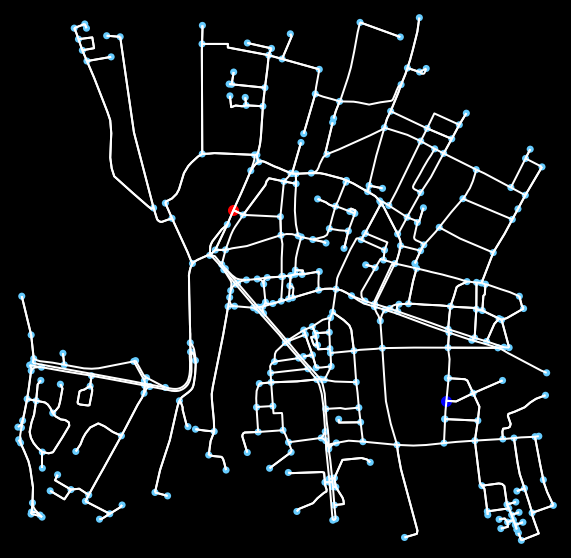

In [10]:
G = ox.graph_from_address('Meaux, France',distance=1000, network_type='drive')
#G_proj=ox.project_graph(G)

fig,ax = ox.plot_graph(G,bgcolor='black',
                       fig_height=10, fig_width=10,
                       edge_color='white',node_size=50,
                       edge_linewidth=2,
                       show=False, close=False)
ax.scatter(maison[1], maison[0], c='red',s=100)
ax.scatter(admin[1], admin[0], c='blue',s=100)


pl.show()

In [11]:
p1=ox.get_nearest_node(G, maison, return_dist=True)
p2=ox.get_nearest_node(G, admin, return_dist=True)

In [12]:
p1[0]

304648795

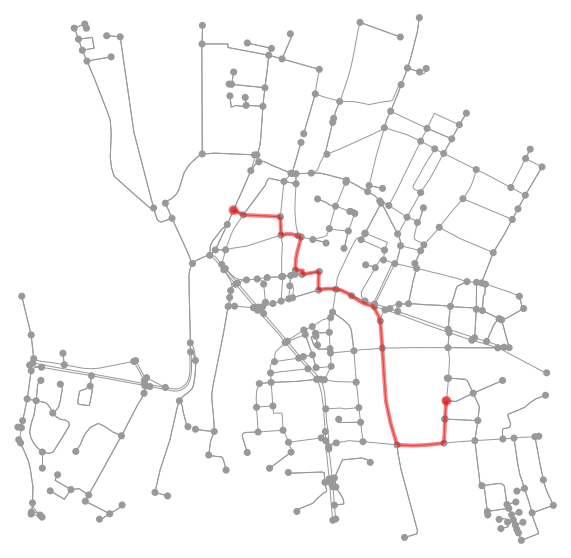

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f8f744588>)

In [13]:
route = nx.shortest_path(G, p1[0],p2[0])

ox.plot_graph_route(G, route, fig_height=10, fig_width=10,node_size=50)

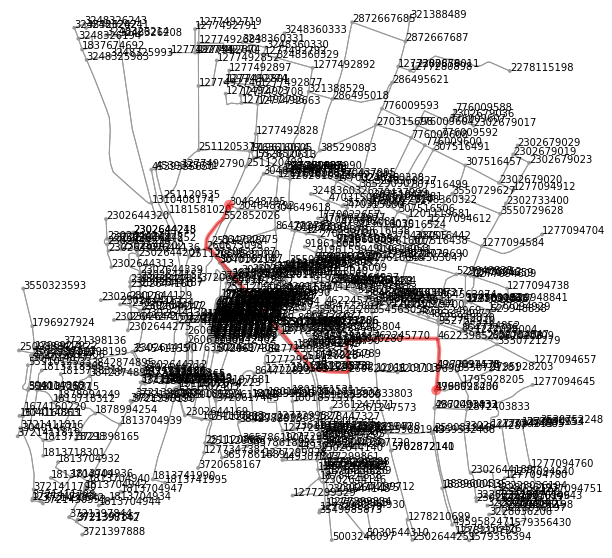

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f8fe9b2b0>)

In [14]:
G1 = ox.graph_from_address('Meaux, France',distance=1000, network_type='walk')
route = nx.shortest_path(G1, p1[0],p2[0])

ox.plot_graph_route(G1, route, fig_height=10, fig_width=10,annotate=True)

In [15]:
import folium

In [16]:
m = ox.plot_route_folium(G1, route, route_color='green')
m

In [17]:
type(ox.plot_route_folium(G1, route, route_color='green'))

folium.folium.Map

In [18]:
m2=ox.plot_route_folium(G1, route, route_color='green',popup_attribute=True)
ox.plot_graph_folium(G1,edge_color='red',edge_width=1,graph_map=m2)
folium.Marker((maison[0],maison[1]),
              popup='maison',
             icon=folium.Icon(color='blue')).add_to(m2)
folium.Marker((admin[0],admin[1]),
              popup='Administration',
             icon=folium.Icon(color='green')).add_to(m2)
folium.TileLayer('stamenterrain').add_to(m2)
m2

In [19]:
G1.nodes(data=True)

NodeDataView({4035764228: {'y': 48.958106, 'x': 2.8809951, 'osmid': 4035764228}, 4035764232: {'y': 48.9581307, 'x': 2.8810447, 'osmid': 4035764232}, 4035764237: {'y': 48.958221, 'x': 2.8803228, 'osmid': 4035764237}, 1763602449: {'y': 48.9558358, 'x': 2.8727915, 'osmid': 1763602449}, 2302644247: {'y': 48.9572241, 'x': 2.8700701, 'osmid': 2302644247}, 2302644248: {'y': 48.9598808, 'x': 2.8697415, 'osmid': 2302644248}, 2302644252: {'y': 48.9596031, 'x': 2.8697456, 'osmid': 2302644252}, 2302644253: {'y': 48.9548754, 'x': 2.8712475, 'osmid': 2302644253}, 2302644259: {'y': 48.9493828, 'x': 2.8842522, 'osmid': 2302644259}, 1763602468: {'y': 48.9573157, 'x': 2.8749594, 'osmid': 1763602468}, 2302644264: {'y': 48.9530598, 'x': 2.8796436, 'osmid': 2302644264, 'highway': 'crossing'}, 2302644271: {'y': 48.9581971, 'x': 2.8695624, 'osmid': 2302644271}, 2302644272: {'y': 48.9568992, 'x': 2.8687249, 'osmid': 2302644272}, 2302644273: {'y': 48.9565434, 'x': 2.8694464, 'osmid': 2302644273}, 2302644276: {

In [20]:
G1.edges(data=True)

OutMultiEdgeDataView([(4035764228, 4035764237, {'osmid': 401121305, 'highway': 'service', 'oneway': False, 'length': 62.495999999999995, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000011F89E7E588>}), (4035764232, 4035783913, {'osmid': 401121303, 'highway': 'service', 'oneway': False, 'length': 34.048, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000011F9009E0F0>}), (4035764237, 2361250414, {'osmid': 227459537, 'name': 'Rue Sauvé Delanoue', 'highway': 'service', 'oneway': False, 'length': 68.582, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000011F905F6EB8>}), (4035764237, 258914026, {'osmid': 227459537, 'name': 'Rue Sauvé Delanoue', 'highway': 'service', 'oneway': False, 'length': 12.914, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000011F8F768160>}), (4035764237, 4035764228, {'osmid': 401121305, 'highway': 'service', 'oneway': False, 'length': 62.496, 'geometry': <shapely.geometry.linestring.LineString 

In [21]:
m2=ox.plot_route_folium(G1, route, route_color='green',popup_attribute=True)
ox.plot_graph_folium(G1,edge_color='red',edge_width=1,graph_map=m2)
for p in G1.nodes(data=True):
    folium.Marker((p[1]['y'],p[1]['x']),
                  popup=str(p[0])).add_to(m2)
folium.TileLayer('stamenterrain').add_to(m2)
m2

In [22]:
nodes, edges = ox.graph_to_gdfs(G1)

In [23]:
nodes.head()

highway      osmid        x        y                      geometry
251120479     NaN  251120479  2.87582  48.9576   POINT (2.875819 48.9575983)
251120484     NaN  251120484   2.8738  48.9595  POINT (2.8737981 48.9595072)
251120488     NaN  251120488  2.87559  48.9621  POINT (2.8755928 48.9621436)
251120535     NaN  251120535  2.87127  48.9611  POINT (2.8712701 48.9610637)
251120537     NaN  251120537  2.87314  48.9627  POINT (2.8731363 48.9626987)

In [24]:
edges.head()

access bridge                                           geometry  highway  \
0    NaN    NaN  LINESTRING (2.8809951 48.958106, 2.8810018 48....  service   
1    NaN    NaN  LINESTRING (2.8810447 48.9581307, 2.8810635 48...  service   
2    NaN    NaN  LINESTRING (2.8803228 48.958221, 2.8807403 48....  service   
3    NaN    NaN  LINESTRING (2.8803228 48.958221, 2.8802226 48....  service   
4    NaN    NaN  LINESTRING (2.8803228 48.958221, 2.880806 48.9...  service   

  junction  key lanes  length maxspeed                name  oneway      osmid  \
0      NaN    0   NaN  62.496      NaN                 NaN   False  401121305   
1      NaN    0   NaN  34.048      NaN                 NaN   False  401121303   
2      NaN    0   NaN  68.582      NaN  Rue Sauvé Delanoue   False  227459537   
3      NaN    0   NaN  12.914      NaN  Rue Sauvé Delanoue   False  227459537   
4      NaN    0   NaN  62.496      NaN                 NaN   False  401121305   

   ref service tunnel           u           v width  
0  NaN     NaN    NaN  4035764228  4035764237   NaN  
1  NaN     NaN    NaN  4035764232  4035783913   NaN  
2  NaN     NaN    NaN  4035764237  2361250414   NaN  
3  NaN     NaN    NaN  4035764237   258914026   NaN  
4  NaN     NaN    NaN  4035764237  4035764228   NaN

In [25]:
edges[(edges['u']==462245782) & (edges['v']==260620268)]['geometry']

1447    LINESTRING (2.8793152 48.9551943, 2.8798559 48...
Name: geometry, dtype: object

In [26]:
edges[(edges['v']==462245782) & (edges['u']==260620268)]

access bridge                                           geometry  \
1535    NaN    NaN  LINESTRING (2.8809272 48.9551144, 2.8798559 48...   

        highway junction  key lanes   length maxspeed              name  \
1535  secondary      NaN    0   NaN  118.272      NaN  Rue Madame Dassy   

      oneway      osmid  ref service tunnel          u          v width  
1535   False  164757740  NaN     NaN    NaN  260620268  462245782   NaN

In [27]:
type(edges[(edges['v']==462245782) & (edges['u']==260620268)]['geometry'])

geopandas.geoseries.GeoSeries

In [28]:
m2=ox.plot_route_folium(G1, route, route_color='green',popup_attribute=True)
ox.plot_graph_folium(G1,edge_color='red',edge_width=1,graph_map=m2)
folium.GeoJson(edges[(edges['v']==462245782) & (edges['u']==260620268)]['geometry']).add_to(m2)
folium.TileLayer('stamenterrain').add_to(m2)
m2

In [29]:
import networkx as nx

In [30]:
Gx = nx.Graph()
pos={}
for s,x,y in zip(nodes['osmid'],nodes['x'],nodes['y']):
    Gx.add_node(int(s))
    pos[int(s)]=[x,y]
for u,v,w in zip(edges['u'],edges['v'],edges['length']):
    Gx.add_edge(u,v,weight=w)

In [31]:
#%matplotlib qt5

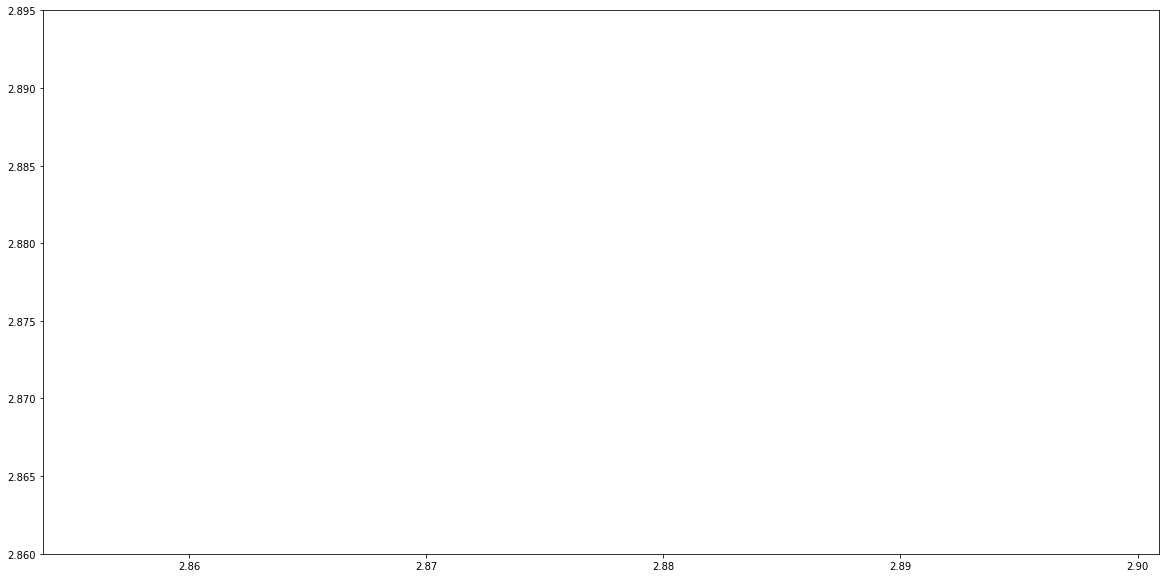

In [32]:
pl.figure(figsize=(20,10))
nx.draw_networkx(Gx,pos,with_labels=False)
etiquettes={ (s1,s2): d['weight'] for s1,s2,d in Gx.edges(data=True) }
#nx.draw_networkx_edge_labels(Gx,pos,edge_labels=etiquettes)
#pl.xlim((48.945,49.968))
pl.ylim((2.86,2.895))
pl.show()

In [33]:
import mplleaflet

In [34]:
fig, ax = pl.subplots(figsize=(20, 15))

nx.draw_networkx(Gx,pos)
etiquettes={ (s1,s2): d['weight'] for s1,s2,d in Gx.edges(data=True) }

mplleaflet.display(fig=ax.figure,tiles='cartodb_positron')